# Probability from scratch

# Conditional probability

Some notations:
    
    When two events E and F are independent, we have:
        P(E, F) = P(E) * P(F)

    If they are not necesserily independent, then we define the prbability of E "conditional on F" as:
        P(E|F) = P(E, F) / P(F)
    It is the probability that E happens, given that F happens.
    Rewriting gives:
        P(E, F) = P(E|F) * P(F)
        
    
    When E and F are independent this gives again:
        P(E|F) = P(E)
    Meaning: knowing that F occurred gives no additional information about whether E occurred. 

In [1]:
from __future__ import division
from collections import Counter
import math, random
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# calculation of: P(E|F) = P(E, F) / P(F)
def random_kid():
    return random.choice(["boy", "girl"])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(1000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

print "P(both | older): ", both_girls / older_girl
print "P(both | either): ", both_girls / either_girl

P(both | older):  0.475609756098
P(both | either):  0.305084745763


# Continuous distribution

    A coin flip corresponds to a discrete distribution. 
    Often we'll want to model distributions across a continuum of outcomes.
    A uniform distribution puts equal weight on all the possible values.
    For this reason, we represent a continuous distribution with a probability density function (pdf) such that the probability of ssing a value in a certain interval equals the integral of the density function over the interval

In [3]:
# density function for the uniform distribution:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

    Often we will be more interested in the cumulative distribution function (cdf), which gives the probability that a random variable is less than or equal to a certain value.

In [4]:
# cumulative distribution for the uniform distribution:
def uniform_cdf(x):
    "returns the prbability that a uniform random variable is <= x"
    if x < 0:
        return 0
    elif x < 1:
        return x
    else:
        return 1

# Normal distribution

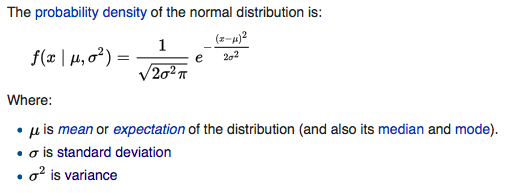

In [5]:
from IPython.display import Image
Image(filename='/Users/annalie/Dev/data-science-from-scratch/normal-distribution.png')

In [6]:
# normal distribution
def normal_pdf(x, mu = 0, sigma = 1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x - mu)**2 /2 / sigma**2) / (sqrt_two_pi * sigma))

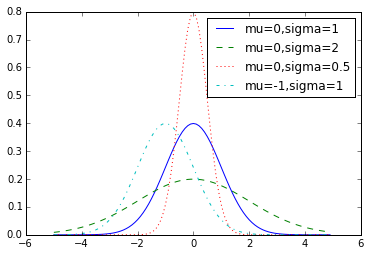

In [7]:
# plot some of these pdf's with different means and standard deviations
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1)   for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.show()

    When mu = 0 and sigma = 1, the distribution is calles standard normal distribution.

In [8]:
# cumulative distribution function for the normal distribution:
def normal_cdf(x, mu = 0, sigma = 1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

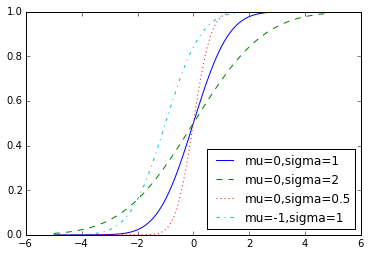

In [9]:
# plot some of these normal cdf's with different means and standard deviations
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.show()

In [10]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0            # normal_cdf(-10) is (very close to) 0
    hi_z,  hi_p  =  10.0, 1            # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break

    return mid_z

print inverse_normal_cdf(0.2, mu=0, sigma=1, tolerance=0.00001)
print inverse_normal_cdf(0.6, mu=0, sigma=1, tolerance=0.00001)

-0.841627120972
0.253343582153
